<a href="https://colab.research.google.com/github/jaketae/jaketae.github.io/blob/master/2020_01_15_first_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
num_class = 10
epochs = 15

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [5]:
X_train.shape

(60000, 784)

In [6]:
y_train.shape

(60000, 10)

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_class, activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stopping_monitor = EarlyStopping(patience=2)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=epochs, callbacks=[early_stopping_monitor], validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 11s 187us/step - loss: 0.2143 - acc: 0.9349 - val_loss: 0.1126 - val_acc: 0.9635
Epoch 2/15
60000/60000 [==============================] - 10s 167us/step - loss: 0.1075 - acc: 0.9670 - val_loss: 0.0861 - val_acc: 0.9720
Epoch 3/15
60000/60000 [==============================] - 10s 168us/step - loss: 0.0802 - acc: 0.9750 - val_loss: 0.0785 - val_acc: 0.9770
Epoch 4/15
60000/60000 [==============================] - 10s 164us/step - loss: 0.0663 - acc: 0.9792 - val_loss: 0.0715 - val_acc: 0.9776
Epoch 5/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.0592 - acc: 0.9815 - val_loss: 0.0670 - val_acc: 0.9808
Epoch 6/15
60000/60000 [==============================] - 10s 166us/step - loss: 0.0512 - acc: 0.9840 - val_loss: 0.0772 - val_acc: 0.9787
Epoch 7/15
600

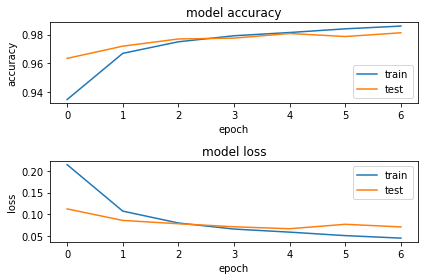

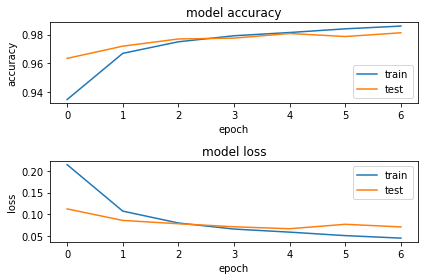

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig